In [3]:
#pip install gensim
#pip install --upgrade gensim

In [2]:
#pip install --upgrade numpy

In [1]:
import gensim

In [4]:
from gensim.models import Word2Vec, FastText

In [5]:
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [6]:
# загрузка данных
df_sentiments = pd.read_csv('data/sentiments.csv')
df_sentiments.head()

,data_name,label_name,rating,review
0,train,pos,9,bromwell high is a cartoon comedy it ran at th...
1,train,pos,8,homelessness or houselessness as george carlin...
2,train,pos,10,brilliant over acting by lesley ann warren bes...
3,train,pos,7,this is easily the most underrated film inn th...
4,train,pos,8,this is not the typical mel brooks film it was...


In [7]:
sentences = [['i', 'like', 'apple', 'pie', 'for', 'dessert'],
           ['i', 'dont', 'drive', 'fast', 'cars'],
           ['data', 'science', 'is', 'fun'],
           ['chocolate', 'is', 'my', 'favorite'],
           ['my', 'favorite', 'movie', 'is', 'predator']]

In [32]:
# train word2vec model
w2v = Word2Vec(sentences, min_count=1, vector_size = 10)

print(w2v)
#word2vec(vocab=19, size=5, alpha=0.025)

Word2Vec<vocab=19, vector_size=10, alpha=0.025>


In [33]:
# access vector for one word
print(w2v.wv.get_vector('chocolate'))

#[-0.04609262 -0.04943436 -0.08968851 -0.08428907  0.01970964]

[-0.037098   -0.08745642  0.05437467  0.06509756 -0.0078755  -0.06709856
 -0.07085925 -0.0249706   0.05143254 -0.03665238]


In [34]:
#list the vocabulary words
words = list(w2v.wv.index_to_key)
print(words)

['is', 'i', 'favorite', 'my', 'drive', 'like', 'apple', 'pie', 'for', 'dessert', 'dont', 'predator', 'fast', 'movie', 'data', 'science', 'fun', 'chocolate', 'cars']


In [35]:
#or show the dictionary of vocab words
w2v.wv.key_to_index

{'is': 0,
 'i': 1,
 'favorite': 2,
 'my': 3,
 'drive': 4,
 'like': 5,
 'apple': 6,
 'pie': 7,
 'for': 8,
 'dessert': 9,
 'dont': 10,
 'predator': 11,
 'fast': 12,
 'movie': 13,
 'data': 14,
 'science': 15,
 'fun': 16,
 'chocolate': 17,
 'cars': 18}

In [36]:
w2v.wv.vectors

array([[-0.0053623 ,  0.00236116,  0.05103017,  0.09009387, -0.09303314,
        -0.0711616 ,  0.06460176,  0.08973071, -0.05015191, -0.03762693],
       [ 0.07380505, -0.01533471, -0.04536613,  0.06554051, -0.0486016 ,
        -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448818],
       [ 0.07311766,  0.05070262,  0.06757693,  0.00762866,  0.06350891,
        -0.03405366, -0.00946401,  0.05768573, -0.07521638, -0.03936104],
       [-0.07511582, -0.00930042,  0.09538119, -0.07319167, -0.02333769,
        -0.01937741,  0.08077437, -0.05930896,  0.00045162, -0.04753734],
       [-0.0960355 ,  0.05007293, -0.08759586, -0.04391825, -0.000351  ,
        -0.00296181, -0.0766124 ,  0.09614743,  0.04982058,  0.09233143],
       [-0.08157917,  0.04495798, -0.04137076,  0.00824536,  0.08498619,
        -0.04462177,  0.045175  , -0.0678696 , -0.03548489,  0.09398508],
       [-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
         0.02469795, -0.00888027,  0.05533662

In [37]:
w2v.wv.vectors.shape

(19, 10)

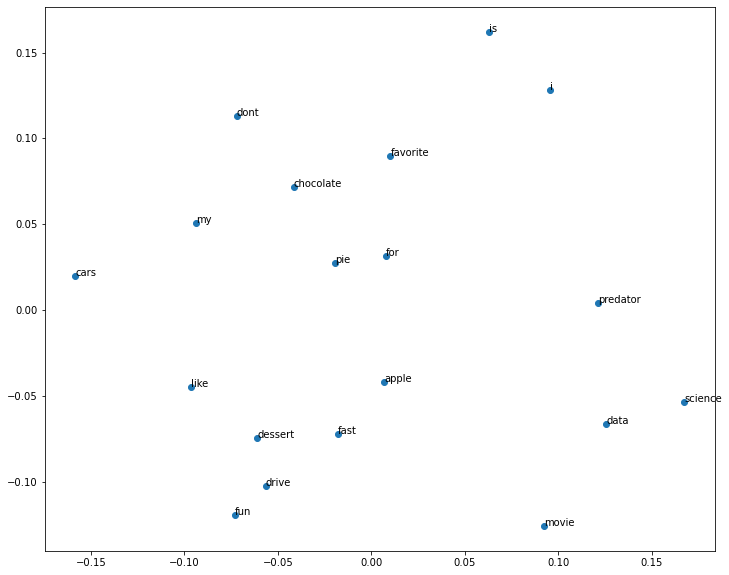

In [38]:
X = w2v.wv.vectors
pca = PCA(n_components=2)

result = pca.fit_transform(X)

plt.figure(figsize=(12,10))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()